In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt

2024-10-18 22:24:46.615091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 22:24:46.632314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 22:24:46.638079: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 22:24:46.651100: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 22:24:47.705969: W tensorflow/compiler/tf2

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


I0000 00:00:1729311889.096832   44495 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729311889.128256   44495 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729311889.128320   44495 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
TARGET_NAMES = ['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'brandine_spuckler','carl_carlson',
                  'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler','comic_book_guy', 'disco_stu', 'dolph_starbeam','duff_man','edna_krabappel',
                  'fat_tony', 'gary_chalmers','gil', 'groundskeeper_willie', 'homer_simpson','jimbo_jones', 'kearney_zzyzwicz','kent_brockman', 'krusty_the_clown', 'lenny_leonard',
                  'lionel_hutz', 'lisa_simpson', 'lunchlady_doris','maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby','milhouse_van_houten',
                  'miss_hoover', 'moe_szyslak', 'ned_flanders','nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner',
                  'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum','selma_bouvier', 'sideshow_bob', 'sideshow_mel',
                  'snake_jailbird','troy_mcclure', 'waylon_smithers']
CLASSES = len(TARGET_NAMES)
image_size_scaling = (128,128)
# TRAIN_ROOT_PATH = "/content/drive/MyDrive/deepLearning/Project/data/simpsons_dataset/simpsons_dataset"
# TEST_ROOT_PATH = "/content/drive/MyDrive/deepLearning/Project/data/simpsons_testdataset/simpsons_testdataset"
TRAIN_ROOT_PATH = "./data/simpsons_dataset/simpsons_dataset"
TEST_ROOT_PATH = "./data/simpsons_testdataset/simpsons_testdataset"
epochs = 200
batch_size = 128
num_of_train_samples = 29894
num_of_test_samples = 4555

In [4]:
#Image Generator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True, # randomly flip images
                                   fill_mode='nearest')

#the train data generator ( retrieves the data and scales it, also feeds using the batches into the model )
train_generator=train_datagen.flow_from_directory(TRAIN_ROOT_PATH,
                                                 target_size=image_size_scaling,
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)
#the validation generator for testing the model
test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(TEST_ROOT_PATH,
                                                        target_size=image_size_scaling,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=True)

Found 29895 images belonging to 49 classes.
Found 4632 images belonging to 49 classes.


In [5]:
#Model
model = Sequential()

# Gonna work wit a 128x128 image on rgb
# First Convolutional Block
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(CLASSES, activation='softmax'))  # output of the classes
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/linux/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729311892.724938   44495 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729311892.725060   44495 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729311892.725091   44495 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729311892.925986   44495 cuda_executor.c

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 49)             │        12,593 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,251,441 (20.03 MB)

 Trainable params: 5,251,441 (20.03 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from keras.callbacks import ModelCheckpoint

# save model weighs only
checkpoint = ModelCheckpoint('model.weights.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)

callbacks_list = [checkpoint]

history = model.fit(
    train_generator,
    steps_per_epoch=num_of_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_of_test_samples // batch_size,
    callbacks=callbacks_list
)


/home/linux/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200


I0000 00:00:1729311898.843256   44628 service.cc:146] XLA service 0x7fc4f0003f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729311898.843302   44628 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-10-18 22:24:58.933544: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-18 22:24:59.325425: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:1729311904.089027   44628 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729311904.435099   44628 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight System

  1/233 ━━━━━━━━━━━━━━━━━━━━ 1:03:25 16s/step - accuracy: 0.0234 - loss: 3.8962

I0000 00:00:1729311911.414762   44628 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 82/233 ━━━━━━━━━━━━━━━━━━━━ 1:40 668ms/step - accuracy: 0.0981 - loss: 3.4371

E0000 00:00:1729311968.678214   44628 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729311968.891109   44628 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.1232 - loss: 3.2541

/home/linux/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.07589, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 197s 779ms/step - accuracy: 0.1234 - loss: 3.2532 - val_accuracy: 0.0759 - val_loss: 3.6914
Epoch 2/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.2188 - loss: 2.6293

2024-10-18 22:28:12.375105: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-18 22:28:12.375196: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-18 22:28:12.375219: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:28:12.375252: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy did not improve from 0.07589
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2188 - loss: 2.6293 - val_accuracy: 0.0461 - val_loss: 3.8029
Epoch 3/200


2024-10-18 22:28:15.290033: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-18 22:28:15.290099: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:28:15.290135: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.2739 - loss: 2.5664
Epoch 3: val_accuracy improved from 0.07589 to 0.17500, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 124s 528ms/step - accuracy: 0.2741 - loss: 2.5658 - val_accuracy: 0.1750 - val_loss: 3.5709
Epoch 4/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 30s 132ms/step - accuracy: 0.4219 - loss: 1.8827
Epoch 4: val_accuracy improved from 0.17500 to 0.25000, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.4219 - loss: 1.8827 - val_accuracy: 0.2500 - val_loss: 3.0023
Epoch 5/200


2024-10-18 22:30:19.747702: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 22:30:19.795408: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-18 22:30:19.795530: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:30:19.795582: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.4579 - loss: 1.9490
Epoch 5: val_accuracy improved from 0.25000 to 0.31808, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 119s 510ms/step - accuracy: 0.4580 - loss: 1.9486 - val_accuracy: 0.3181 - val_loss: 2.8850
Epoch 6/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - accuracy: 0.5469 - loss: 1.6631
Epoch 6: val_accuracy did not improve from 0.31808
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.5469 - loss: 1.6631 - val_accuracy: 0.2829 - val_loss: 3.4716
Epoch 7/200


2024-10-18 22:32:18.927302: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 22:32:18.967609: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:32:18.967690: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.5653 - loss: 1.5796
Epoch 7: val_accuracy improved from 0.31808 to 0.45580, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 115s 494ms/step - accuracy: 0.5654 - loss: 1.5793 - val_accuracy: 0.4558 - val_loss: 2.3012
Epoch 8/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.6406 - loss: 1.2826
Epoch 8: val_accuracy improved from 0.45580 to 0.49342, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.6406 - loss: 1.2826 - val_accuracy: 0.4934 - val_loss: 2.4658
Epoch 9/200


2024-10-18 22:34:14.268771: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:34:14.268896: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 22:34:14.303247: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-18 22:34:14.303337: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:34:14.303394: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.6417 - loss: 1.3134
Epoch 9: val_accuracy improved from 0.49342 to 0.55379, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 116s 499ms/step - accuracy: 0.6418 - loss: 1.3132 - val_accuracy: 0.5538 - val_loss: 1.7242
Epoch 10/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.6797 - loss: 1.1094
Epoch 10: val_accuracy improved from 0.55379 to 0.57895, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.6797 - loss: 1.1094 - val_accuracy: 0.5789 - val_loss: 1.8308
Epoch 11/200


2024-10-18 22:36:11.001154: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 22:36:11.037505: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:36:11.037583: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.6966 - loss: 1.1157
Epoch 11: val_accuracy improved from 0.57895 to 0.61161, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 460ms/step - accuracy: 0.6966 - loss: 1.1156 - val_accuracy: 0.6116 - val_loss: 1.5605
Epoch 12/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.6484 - loss: 1.2082
Epoch 12: val_accuracy improved from 0.61161 to 0.67105, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.6484 - loss: 1.2082 - val_accuracy: 0.6711 - val_loss: 1.4548
Epoch 13/200


2024-10-18 22:37:58.587003: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:37:58.587084: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.7314 - loss: 0.9854
Epoch 13: val_accuracy did not improve from 0.67105
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 456ms/step - accuracy: 0.7314 - loss: 0.9853 - val_accuracy: 0.6397 - val_loss: 1.6182
Epoch 14/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.7500 - loss: 0.9433
Epoch 14: val_accuracy did not improve from 0.67105
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step - accuracy: 0.7500 - loss: 0.9433 - val_accuracy: 0.6382 - val_loss: 1.7327
Epoch 15/200


2024-10-18 22:39:45.240625: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:39:45.240704: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 22:39:45.269954: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:39:45.270036: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.7501 - loss: 0.9103
Epoch 15: val_accuracy did not improve from 0.67105
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 453ms/step - accuracy: 0.7501 - loss: 0.9102 - val_accuracy: 0.6661 - val_loss: 1.5178
Epoch 16/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.8047 - loss: 0.6936
Epoch 16: val_accuracy did not improve from 0.67105
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.8047 - loss: 0.6936 - val_accuracy: 0.6250 - val_loss: 1.6915
Epoch 17/200


2024-10-18 22:41:31.177196: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 22:41:31.214080: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-18 22:41:31.214151: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:41:31.214196: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.7807 - loss: 0.8203
Epoch 17: val_accuracy did not improve from 0.67105
233/233 ━━━━━━━━━━━━━━━━━━━━ 109s 468ms/step - accuracy: 0.7807 - loss: 0.8202 - val_accuracy: 0.6567 - val_loss: 1.6387
Epoch 18/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.7656 - loss: 0.8787
Epoch 18: val_accuracy improved from 0.67105 to 0.76974, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7656 - loss: 0.8787 - val_accuracy: 0.7697 - val_loss: 1.2237
Epoch 19/200


2024-10-18 22:43:20.529548: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:43:20.529637: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.8002 - loss: 0.7336
Epoch 19: val_accuracy did not improve from 0.76974
233/233 ━━━━━━━━━━━━━━━━━━━━ 102s 437ms/step - accuracy: 0.8002 - loss: 0.7337 - val_accuracy: 0.7393 - val_loss: 1.1027
Epoch 20/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - accuracy: 0.8047 - loss: 0.8870
Epoch 20: val_accuracy did not improve from 0.76974
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.8047 - loss: 0.8870 - val_accuracy: 0.6974 - val_loss: 1.3254
Epoch 21/200


2024-10-18 22:45:02.684809: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:45:02.684883: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 22:45:02.721182: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:45:02.721261: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.8117 - loss: 0.6988
Epoch 21: val_accuracy did not improve from 0.76974
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 455ms/step - accuracy: 0.8117 - loss: 0.6987 - val_accuracy: 0.7489 - val_loss: 1.2222
Epoch 22/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.8203 - loss: 0.5681
Epoch 22: val_accuracy did not improve from 0.76974
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.8203 - loss: 0.5681 - val_accuracy: 0.7500 - val_loss: 1.1107
Epoch 23/200


2024-10-18 22:46:48.898865: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 22:46:48.935989: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:46:48.936071: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.8218 - loss: 0.6611
Epoch 23: val_accuracy improved from 0.76974 to 0.77812, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 454ms/step - accuracy: 0.8218 - loss: 0.6611 - val_accuracy: 0.7781 - val_loss: 0.9687
Epoch 24/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.8203 - loss: 0.6302
Epoch 24: val_accuracy did not improve from 0.77812
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - accuracy: 0.8203 - loss: 0.6302 - val_accuracy: 0.7039 - val_loss: 1.4899
Epoch 25/200


2024-10-18 22:48:34.894289: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 22:48:34.924323: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:48:34.924409: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.8343 - loss: 0.6077
Epoch 25: val_accuracy did not improve from 0.77812
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 455ms/step - accuracy: 0.8343 - loss: 0.6077 - val_accuracy: 0.7000 - val_loss: 1.1928
Epoch 26/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.8281 - loss: 0.4823
Epoch 26: val_accuracy did not improve from 0.77812
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.8281 - loss: 0.4823 - val_accuracy: 0.7434 - val_loss: 1.1716
Epoch 27/200


2024-10-18 22:50:21.286403: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:50:21.286484: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8392 - loss: 0.5853
Epoch 27: val_accuracy improved from 0.77812 to 0.78304, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 458ms/step - accuracy: 0.8392 - loss: 0.5853 - val_accuracy: 0.7830 - val_loss: 1.0004
Epoch 28/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.8281 - loss: 0.5785
Epoch 28: val_accuracy improved from 0.78304 to 0.78947, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.8281 - loss: 0.5785 - val_accuracy: 0.7895 - val_loss: 0.9075
Epoch 29/200


2024-10-18 22:52:08.219663: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:52:08.219760: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.8539 - loss: 0.5262
Epoch 29: val_accuracy improved from 0.78947 to 0.82076, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 109s 466ms/step - accuracy: 0.8539 - loss: 0.5263 - val_accuracy: 0.8208 - val_loss: 0.8536
Epoch 30/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.8750 - loss: 0.4538
Epoch 30: val_accuracy improved from 0.82076 to 0.82237, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8750 - loss: 0.4538 - val_accuracy: 0.8224 - val_loss: 0.8524
Epoch 31/200


2024-10-18 22:53:57.159485: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:53:57.159587: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.8563 - loss: 0.5199
Epoch 31: val_accuracy did not improve from 0.82237
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 452ms/step - accuracy: 0.8563 - loss: 0.5200 - val_accuracy: 0.7600 - val_loss: 1.3929
Epoch 32/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.8594 - loss: 0.4370
Epoch 32: val_accuracy did not improve from 0.82237
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.8594 - loss: 0.4370 - val_accuracy: 0.7566 - val_loss: 1.7296
Epoch 33/200


2024-10-18 22:55:42.847881: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-18 22:55:42.847935: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:55:42.847971: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8542 - loss: 0.5340
Epoch 33: val_accuracy did not improve from 0.82237
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 450ms/step - accuracy: 0.8542 - loss: 0.5340 - val_accuracy: 0.8165 - val_loss: 0.9911
Epoch 34/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.9062 - loss: 0.4441
Epoch 34: val_accuracy improved from 0.82237 to 0.83553, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.9062 - loss: 0.4441 - val_accuracy: 0.8355 - val_loss: 0.8892
Epoch 35/200


2024-10-18 22:57:27.977912: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:57:27.977987: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8600 - loss: 0.5126
Epoch 35: val_accuracy did not improve from 0.83553
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 452ms/step - accuracy: 0.8600 - loss: 0.5126 - val_accuracy: 0.7408 - val_loss: 1.7152
Epoch 36/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.8594 - loss: 0.5315
Epoch 36: val_accuracy did not improve from 0.83553
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.8594 - loss: 0.5315 - val_accuracy: 0.7632 - val_loss: 1.6136
Epoch 37/200


2024-10-18 22:59:13.668330: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 22:59:13.668406: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8753 - loss: 0.4723
Epoch 37: val_accuracy did not improve from 0.83553
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 458ms/step - accuracy: 0.8753 - loss: 0.4723 - val_accuracy: 0.8248 - val_loss: 0.9245
Epoch 38/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.8984 - loss: 0.3969
Epoch 38: val_accuracy did not improve from 0.83553
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.8984 - loss: 0.3969 - val_accuracy: 0.8158 - val_loss: 0.7339
Epoch 39/200


2024-10-18 23:01:00.617899: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:01:00.617979: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.8752 - loss: 0.4498
Epoch 39: val_accuracy improved from 0.83553 to 0.86027, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 104s 446ms/step - accuracy: 0.8752 - loss: 0.4498 - val_accuracy: 0.8603 - val_loss: 0.6672
Epoch 40/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9297 - loss: 0.3248
Epoch 40: val_accuracy did not improve from 0.86027
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.9297 - loss: 0.3248 - val_accuracy: 0.8487 - val_loss: 0.6844
Epoch 41/200


2024-10-18 23:02:44.802234: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:02:44.838914: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:02:44.839022: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.8752 - loss: 0.4469
Epoch 41: val_accuracy did not improve from 0.86027
233/233 ━━━━━━━━━━━━━━━━━━━━ 108s 462ms/step - accuracy: 0.8752 - loss: 0.4469 - val_accuracy: 0.8346 - val_loss: 0.7433
Epoch 42/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.8594 - loss: 0.4420
Epoch 42: val_accuracy improved from 0.86027 to 0.86842, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.8594 - loss: 0.4420 - val_accuracy: 0.8684 - val_loss: 0.5814
Epoch 43/200


2024-10-18 23:04:32.613429: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:04:32.650004: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:04:32.650085: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.8845 - loss: 0.4256
Epoch 43: val_accuracy did not improve from 0.86842
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 452ms/step - accuracy: 0.8845 - loss: 0.4258 - val_accuracy: 0.8388 - val_loss: 0.7991
Epoch 44/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.8516 - loss: 0.4914
Epoch 44: val_accuracy did not improve from 0.86842
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - accuracy: 0.8516 - loss: 0.4914 - val_accuracy: 0.8684 - val_loss: 0.4863
Epoch 45/200


2024-10-18 23:06:18.241661: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:06:18.241736: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:06:18.272162: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:06:18.272240: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.8836 - loss: 0.4222
Epoch 45: val_accuracy did not improve from 0.86842
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 458ms/step - accuracy: 0.8836 - loss: 0.4222 - val_accuracy: 0.8301 - val_loss: 0.9383
Epoch 46/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.8984 - loss: 0.3859
Epoch 46: val_accuracy did not improve from 0.86842
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.8984 - loss: 0.3859 - val_accuracy: 0.8421 - val_loss: 0.9247
Epoch 47/200


2024-10-18 23:08:05.151290: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:08:05.151380: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:08:05.191625: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:08:05.191704: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8834 - loss: 0.4208
Epoch 47: val_accuracy did not improve from 0.86842
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 452ms/step - accuracy: 0.8834 - loss: 0.4208 - val_accuracy: 0.8551 - val_loss: 0.6572
Epoch 48/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.8359 - loss: 0.5058
Epoch 48: val_accuracy did not improve from 0.86842
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8359 - loss: 0.5058 - val_accuracy: 0.8421 - val_loss: 0.6230
Epoch 49/200


2024-10-18 23:09:50.644291: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:09:50.695805: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:09:50.695884: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8927 - loss: 0.3938
Epoch 49: val_accuracy did not improve from 0.86842
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 454ms/step - accuracy: 0.8927 - loss: 0.3938 - val_accuracy: 0.8652 - val_loss: 0.6511
Epoch 50/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.9141 - loss: 0.3303
Epoch 50: val_accuracy did not improve from 0.86842
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.9141 - loss: 0.3303 - val_accuracy: 0.8289 - val_loss: 0.7092
Epoch 51/200


2024-10-18 23:11:36.623509: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:11:36.623622: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:11:36.660276: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:11:36.660374: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8910 - loss: 0.4018
Epoch 51: val_accuracy improved from 0.86842 to 0.88661, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 458ms/step - accuracy: 0.8910 - loss: 0.4018 - val_accuracy: 0.8866 - val_loss: 0.5384
Epoch 52/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.9219 - loss: 0.3923
Epoch 52: val_accuracy improved from 0.88661 to 0.90789, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.9219 - loss: 0.3923 - val_accuracy: 0.9079 - val_loss: 0.4777
Epoch 53/200


2024-10-18 23:13:23.584073: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:13:23.584144: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:13:23.620581: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:13:23.620655: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8958 - loss: 0.3822
Epoch 53: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 454ms/step - accuracy: 0.8958 - loss: 0.3822 - val_accuracy: 0.8790 - val_loss: 0.5923
Epoch 54/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - accuracy: 0.8906 - loss: 0.3734
Epoch 54: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.8906 - loss: 0.3734 - val_accuracy: 0.8947 - val_loss: 0.5688
Epoch 55/200


2024-10-18 23:15:09.771873: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:15:09.771946: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:15:09.806838: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:15:09.806914: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9026 - loss: 0.3678
Epoch 55: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 454ms/step - accuracy: 0.9025 - loss: 0.3678 - val_accuracy: 0.8596 - val_loss: 0.6758
Epoch 56/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.9141 - loss: 0.3126
Epoch 56: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - accuracy: 0.9141 - loss: 0.3126 - val_accuracy: 0.8947 - val_loss: 0.5392
Epoch 57/200


2024-10-18 23:16:55.828635: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:16:55.828743: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8996 - loss: 0.3651
Epoch 57: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 452ms/step - accuracy: 0.8996 - loss: 0.3652 - val_accuracy: 0.8507 - val_loss: 0.9173
Epoch 58/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.8906 - loss: 0.3095
Epoch 58: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.8906 - loss: 0.3095 - val_accuracy: 0.8618 - val_loss: 0.8462
Epoch 59/200


2024-10-18 23:18:41.323008: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:18:41.323083: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8989 - loss: 0.3615
Epoch 59: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 104s 447ms/step - accuracy: 0.8989 - loss: 0.3615 - val_accuracy: 0.8538 - val_loss: 0.7968
Epoch 60/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.8906 - loss: 0.4556
Epoch 60: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - accuracy: 0.8906 - loss: 0.4556 - val_accuracy: 0.8553 - val_loss: 0.8314
Epoch 61/200


2024-10-18 23:20:25.727972: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:20:25.728066: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:20:25.761718: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:20:25.761798: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.8996 - loss: 0.3647
Epoch 61: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 460ms/step - accuracy: 0.8996 - loss: 0.3647 - val_accuracy: 0.8513 - val_loss: 0.9941
Epoch 62/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.8750 - loss: 0.5063
Epoch 62: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - accuracy: 0.8750 - loss: 0.5063 - val_accuracy: 0.8487 - val_loss: 0.8139
Epoch 63/200


2024-10-18 23:22:13.281603: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:22:13.281677: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:22:13.315242: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:22:13.315322: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9051 - loss: 0.3562
Epoch 63: val_accuracy did not improve from 0.90789
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 451ms/step - accuracy: 0.9051 - loss: 0.3561 - val_accuracy: 0.9013 - val_loss: 0.5308
Epoch 64/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8750 - loss: 0.5192
Epoch 64: val_accuracy improved from 0.90789 to 0.91447, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8750 - loss: 0.5192 - val_accuracy: 0.9145 - val_loss: 0.4781
Epoch 65/200


2024-10-18 23:23:58.575668: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-18 23:23:58.575723: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:23:58.575759: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9089 - loss: 0.3376
Epoch 65: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 452ms/step - accuracy: 0.9089 - loss: 0.3376 - val_accuracy: 0.8587 - val_loss: 0.7879
Epoch 66/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9219 - loss: 0.3102
Epoch 66: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.9219 - loss: 0.3102 - val_accuracy: 0.8618 - val_loss: 0.7946
Epoch 67/200


2024-10-18 23:25:44.387548: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:25:44.387629: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:25:44.421660: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:25:44.421741: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9097 - loss: 0.3286
Epoch 67: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 455ms/step - accuracy: 0.9097 - loss: 0.3287 - val_accuracy: 0.8674 - val_loss: 0.7073
Epoch 68/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 26s 115ms/step - accuracy: 0.8750 - loss: 0.4207
Epoch 68: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.8750 - loss: 0.4207 - val_accuracy: 0.8750 - val_loss: 0.4235
Epoch 69/200


2024-10-18 23:27:30.741180: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:27:30.741255: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:27:30.778795: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:27:30.778877: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9088 - loss: 0.3288
Epoch 69: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 452ms/step - accuracy: 0.9088 - loss: 0.3289 - val_accuracy: 0.8989 - val_loss: 0.5119
Epoch 70/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.8984 - loss: 0.4048
Epoch 70: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.8984 - loss: 0.4048 - val_accuracy: 0.8882 - val_loss: 0.8918
Epoch 71/200


2024-10-18 23:29:16.344624: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:29:16.344723: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:29:16.380109: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:29:16.380198: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9129 - loss: 0.3292
Epoch 71: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 455ms/step - accuracy: 0.9128 - loss: 0.3293 - val_accuracy: 0.9020 - val_loss: 0.5320
Epoch 72/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9219 - loss: 0.4074
Epoch 72: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.9219 - loss: 0.4074 - val_accuracy: 0.8882 - val_loss: 0.6219
Epoch 73/200


2024-10-18 23:31:02.683139: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:31:02.683211: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:31:02.719129: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:31:02.719216: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.9111 - loss: 0.3279
Epoch 73: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 108s 462ms/step - accuracy: 0.9111 - loss: 0.3279 - val_accuracy: 0.8877 - val_loss: 0.6436
Epoch 74/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.8594 - loss: 0.4226
Epoch 74: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.8594 - loss: 0.4226 - val_accuracy: 0.8421 - val_loss: 0.9476
Epoch 75/200


2024-10-18 23:32:50.569583: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:32:50.569664: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.9118 - loss: 0.3170
Epoch 75: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 456ms/step - accuracy: 0.9118 - loss: 0.3170 - val_accuracy: 0.8980 - val_loss: 0.5095
Epoch 76/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.8906 - loss: 0.3562
Epoch 76: val_accuracy did not improve from 0.91447
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.8906 - loss: 0.3562 - val_accuracy: 0.8750 - val_loss: 0.5996
Epoch 77/200


2024-10-18 23:34:37.070439: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:34:37.070534: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:34:37.108130: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:34:37.108216: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.9111 - loss: 0.3276
Epoch 77: val_accuracy improved from 0.91447 to 0.91719, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 109s 466ms/step - accuracy: 0.9111 - loss: 0.3276 - val_accuracy: 0.9172 - val_loss: 0.4655
Epoch 78/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.9219 - loss: 0.3128
Epoch 78: val_accuracy did not improve from 0.91719
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.9219 - loss: 0.3128 - val_accuracy: 0.9079 - val_loss: 0.5579
Epoch 79/200


2024-10-18 23:36:25.900175: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:36:25.900275: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:36:25.934274: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:36:25.934350: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9163 - loss: 0.3021
Epoch 79: val_accuracy did not improve from 0.91719
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 454ms/step - accuracy: 0.9163 - loss: 0.3022 - val_accuracy: 0.8388 - val_loss: 0.7540
Epoch 80/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.8906 - loss: 0.3830
Epoch 80: val_accuracy did not improve from 0.91719
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.8906 - loss: 0.3830 - val_accuracy: 0.8421 - val_loss: 0.9346
Epoch 81/200


2024-10-18 23:38:12.003292: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:38:12.003375: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:38:12.038196: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:38:12.038274: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9135 - loss: 0.3167
Epoch 81: val_accuracy did not improve from 0.91719
233/233 ━━━━━━━━━━━━━━━━━━━━ 108s 461ms/step - accuracy: 0.9135 - loss: 0.3167 - val_accuracy: 0.9042 - val_loss: 0.5468
Epoch 82/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9297 - loss: 0.2014
Epoch 82: val_accuracy did not improve from 0.91719
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.9297 - loss: 0.2014 - val_accuracy: 0.8816 - val_loss: 0.5421
Epoch 83/200


2024-10-18 23:39:59.686077: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:39:59.686189: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:39:59.720281: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:39:59.720367: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9180 - loss: 0.2931
Epoch 83: val_accuracy did not improve from 0.91719
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 453ms/step - accuracy: 0.9180 - loss: 0.2932 - val_accuracy: 0.9058 - val_loss: 0.5289
Epoch 84/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - accuracy: 0.9062 - loss: 0.2949
Epoch 84: val_accuracy improved from 0.91719 to 0.93421, saving model to model.weights.h5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9062 - loss: 0.2949 - val_accuracy: 0.9342 - val_loss: 0.4023
Epoch 85/200


2024-10-18 23:41:45.517857: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:41:45.554204: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:41:45.554281: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9158 - loss: 0.3047
Epoch 85: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 452ms/step - accuracy: 0.9158 - loss: 0.3047 - val_accuracy: 0.8786 - val_loss: 0.6310
Epoch 86/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9375 - loss: 0.1844
Epoch 86: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.9375 - loss: 0.1844 - val_accuracy: 0.8618 - val_loss: 0.8637
Epoch 87/200


2024-10-18 23:43:31.331640: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:43:31.331716: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:43:31.366092: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:43:31.366167: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9145 - loss: 0.3013
Epoch 87: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 455ms/step - accuracy: 0.9145 - loss: 0.3013 - val_accuracy: 0.8779 - val_loss: 0.5721
Epoch 88/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.9062 - loss: 0.3085
Epoch 88: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - accuracy: 0.9062 - loss: 0.3085 - val_accuracy: 0.8882 - val_loss: 0.5215
Epoch 89/200


2024-10-18 23:45:17.603170: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:45:17.603250: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:45:17.641323: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:45:17.641403: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9174 - loss: 0.2972
Epoch 89: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 451ms/step - accuracy: 0.9174 - loss: 0.2971 - val_accuracy: 0.8817 - val_loss: 0.6173
Epoch 90/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.8828 - loss: 0.3780
Epoch 90: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - accuracy: 0.8828 - loss: 0.3780 - val_accuracy: 0.9079 - val_loss: 0.5611
Epoch 91/200


2024-10-18 23:47:03.052451: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:47:03.052610: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:47:03.080761: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:47:03.080840: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9191 - loss: 0.2995
Epoch 91: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 460ms/step - accuracy: 0.9191 - loss: 0.2995 - val_accuracy: 0.8810 - val_loss: 1.3157
Epoch 92/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9375 - loss: 0.2640
Epoch 92: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.9375 - loss: 0.2640 - val_accuracy: 0.8882 - val_loss: 1.2140
Epoch 93/200


2024-10-18 23:48:50.577778: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:48:50.577885: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:48:50.612434: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:48:50.612510: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.9212 - loss: 0.2885
Epoch 93: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 108s 464ms/step - accuracy: 0.9212 - loss: 0.2885 - val_accuracy: 0.8498 - val_loss: 1.5227
Epoch 94/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9453 - loss: 0.1966
Epoch 94: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - accuracy: 0.9453 - loss: 0.1966 - val_accuracy: 0.8421 - val_loss: 1.5533
Epoch 95/200


2024-10-18 23:50:38.977501: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:50:39.008399: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:50:39.008481: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9245 - loss: 0.2809
Epoch 95: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 455ms/step - accuracy: 0.9244 - loss: 0.2810 - val_accuracy: 0.8897 - val_loss: 0.5828
Epoch 96/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.8750 - loss: 0.3680
Epoch 96: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - accuracy: 0.8750 - loss: 0.3680 - val_accuracy: 0.9079 - val_loss: 0.4845
Epoch 97/200


2024-10-18 23:52:25.244055: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:52:25.244133: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:52:25.280432: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:52:25.280513: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9230 - loss: 0.2759
Epoch 97: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 454ms/step - accuracy: 0.9230 - loss: 0.2759 - val_accuracy: 0.8917 - val_loss: 0.6416
Epoch 98/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 112ms/step - accuracy: 0.9297 - loss: 0.3774
Epoch 98: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step - accuracy: 0.9297 - loss: 0.3774 - val_accuracy: 0.8947 - val_loss: 0.6854
Epoch 99/200


2024-10-18 23:54:11.350817: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:54:11.351013: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:54:11.382985: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:54:11.383075: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9226 - loss: 0.2776
Epoch 99: val_accuracy did not improve from 0.93421
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 459ms/step - accuracy: 0.9226 - loss: 0.2776 - val_accuracy: 0.8942 - val_loss: 0.6005
Epoch 100/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - accuracy: 0.9062 - loss: 0.2983
Epoch 100: val_accuracy improved from 0.93421 to 0.94079, saving model to model.weights.h5


2024-10-18 23:55:58.673932: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:55:58.674006: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-18 23:55:58.710276: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:55:58.710410: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9062 - loss: 0.2983 - val_accuracy: 0.9408 - val_loss: 0.2754
Epoch 101/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9231 - loss: 0.2781
Epoch 101: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 142s 454ms/step - accuracy: 0.9231 - loss: 0.2782 - val_accuracy: 0.8837 - val_loss: 0.6526
Epoch 102/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9297 - loss: 0.2789
Epoch 102: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.9297 - loss: 0.2789 - val_accuracy: 0.8618 - val_loss: 0.6762
Epoch 103/200


2024-10-18 23:58:21.377053: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-18 23:58:21.377132: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9254 - loss: 0.2771
Epoch 103: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 449ms/step - accuracy: 0.9254 - loss: 0.2771 - val_accuracy: 0.9018 - val_loss: 0.5635
Epoch 104/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.9766 - loss: 0.1189
Epoch 104: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - accuracy: 0.9766 - loss: 0.1189 - val_accuracy: 0.9276 - val_loss: 0.4416
Epoch 105/200


2024-10-19 00:00:06.222257: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:00:06.222331: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:00:06.256447: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:00:06.256548: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9286 - loss: 0.2679
Epoch 105: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 455ms/step - accuracy: 0.9285 - loss: 0.2679 - val_accuracy: 0.8772 - val_loss: 0.9882
Epoch 106/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.9297 - loss: 0.2306
Epoch 106: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step - accuracy: 0.9297 - loss: 0.2306 - val_accuracy: 0.8487 - val_loss: 1.3543
Epoch 107/200


2024-10-19 00:01:52.615758: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:01:52.615836: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9242 - loss: 0.2792
Epoch 107: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 451ms/step - accuracy: 0.9242 - loss: 0.2792 - val_accuracy: 0.8679 - val_loss: 0.7923
Epoch 108/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9062 - loss: 0.2955
Epoch 108: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - accuracy: 0.9062 - loss: 0.2955 - val_accuracy: 0.8421 - val_loss: 0.8284
Epoch 109/200


2024-10-19 00:03:37.871792: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:03:37.871870: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:03:37.902082: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:03:37.902177: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9245 - loss: 0.2606
Epoch 109: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 457ms/step - accuracy: 0.9245 - loss: 0.2606 - val_accuracy: 0.8743 - val_loss: 0.9073
Epoch 110/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.9688 - loss: 0.1403
Epoch 110: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.9688 - loss: 0.1403 - val_accuracy: 0.9408 - val_loss: 0.3216
Epoch 111/200


2024-10-19 00:05:24.546651: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:05:24.546742: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.9268 - loss: 0.2666
Epoch 111: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 109s 466ms/step - accuracy: 0.9268 - loss: 0.2666 - val_accuracy: 0.9127 - val_loss: 0.5142
Epoch 112/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9375 - loss: 0.3115
Epoch 112: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.9375 - loss: 0.3115 - val_accuracy: 0.9145 - val_loss: 0.5898
Epoch 113/200


2024-10-19 00:07:13.392998: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:07:13.393088: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:07:13.430954: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:07:13.431032: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9275 - loss: 0.2626
Epoch 113: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 455ms/step - accuracy: 0.9275 - loss: 0.2626 - val_accuracy: 0.8710 - val_loss: 1.0977
Epoch 114/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.9297 - loss: 0.2495
Epoch 114: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - accuracy: 0.9297 - loss: 0.2495 - val_accuracy: 0.8684 - val_loss: 1.3441
Epoch 115/200


2024-10-19 00:08:59.649333: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:08:59.649408: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9287 - loss: 0.2669
Epoch 115: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 452ms/step - accuracy: 0.9287 - loss: 0.2669 - val_accuracy: 0.8902 - val_loss: 1.0254
Epoch 116/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 27s 120ms/step - accuracy: 0.9453 - loss: 0.3050
Epoch 116: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - accuracy: 0.9453 - loss: 0.3050 - val_accuracy: 0.9079 - val_loss: 1.0678
Epoch 117/200


2024-10-19 00:10:45.155771: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:10:45.155866: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.9309 - loss: 0.2516
Epoch 117: val_accuracy did not improve from 0.94079
233/233 ━━━━━━━━━━━━━━━━━━━━ 108s 463ms/step - accuracy: 0.9309 - loss: 0.2517 - val_accuracy: 0.9004 - val_loss: 0.6040
Epoch 118/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.9062 - loss: 0.3834
Epoch 118: val_accuracy improved from 0.94079 to 0.96053, saving model to model.weights.h5


2024-10-19 00:12:33.213604: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:12:33.244089: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:12:33.244189: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9062 - loss: 0.3834 - val_accuracy: 0.9605 - val_loss: 0.5940
Epoch 119/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.9298 - loss: 0.2551
Epoch 119: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 108s 461ms/step - accuracy: 0.9298 - loss: 0.2551 - val_accuracy: 0.8748 - val_loss: 0.8374
Epoch 120/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.8984 - loss: 0.4717
Epoch 120: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.8984 - loss: 0.4717 - val_accuracy: 0.8816 - val_loss: 0.7720
Epoch 121/200


2024-10-19 00:14:21.078842: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:14:21.116134: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:14:21.116211: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9292 - loss: 0.2601
Epoch 121: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 458ms/step - accuracy: 0.9292 - loss: 0.2601 - val_accuracy: 0.8864 - val_loss: 0.8686
Epoch 122/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.9453 - loss: 0.1891
Epoch 122: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.9453 - loss: 0.1891 - val_accuracy: 0.9211 - val_loss: 0.5418
Epoch 123/200


2024-10-19 00:16:08.045046: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:16:08.045128: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9327 - loss: 0.2399
Epoch 123: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 459ms/step - accuracy: 0.9327 - loss: 0.2400 - val_accuracy: 0.9167 - val_loss: 0.5850
Epoch 124/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9219 - loss: 0.2203
Epoch 124: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - accuracy: 0.9219 - loss: 0.2203 - val_accuracy: 0.9145 - val_loss: 0.5878
Epoch 125/200


2024-10-19 00:17:55.315392: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:17:55.315470: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:17:55.348636: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:17:55.348720: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9320 - loss: 0.2423
Epoch 125: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 456ms/step - accuracy: 0.9320 - loss: 0.2424 - val_accuracy: 0.8931 - val_loss: 0.7440
Epoch 126/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - accuracy: 0.9297 - loss: 0.2005
Epoch 126: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - accuracy: 0.9297 - loss: 0.2005 - val_accuracy: 0.8355 - val_loss: 1.0917
Epoch 127/200


2024-10-19 00:19:42.117034: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:19:42.117115: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9330 - loss: 0.2482
Epoch 127: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 453ms/step - accuracy: 0.9330 - loss: 0.2482 - val_accuracy: 0.9237 - val_loss: 0.6052
Epoch 128/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9219 - loss: 0.2489
Epoch 128: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9219 - loss: 0.2489 - val_accuracy: 0.8882 - val_loss: 1.1317
Epoch 129/200


2024-10-19 00:21:27.792117: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:21:27.792190: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:21:27.853753: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-19 00:21:27.853813: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:21:27.853850: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.9309 - loss: 0.2524
Epoch 129: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 109s 468ms/step - accuracy: 0.9309 - loss: 0.2524 - val_accuracy: 0.8862 - val_loss: 0.7747
Epoch 130/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - accuracy: 0.9219 - loss: 0.2300
Epoch 130: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.9219 - loss: 0.2300 - val_accuracy: 0.9079 - val_loss: 0.7601
Epoch 131/200


2024-10-19 00:23:17.230021: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:23:17.230132: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:23:17.266967: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:23:17.267041: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9346 - loss: 0.2500
Epoch 131: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 451ms/step - accuracy: 0.9346 - loss: 0.2500 - val_accuracy: 0.8938 - val_loss: 0.8203
Epoch 132/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9141 - loss: 0.2455
Epoch 132: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.9141 - loss: 0.2455 - val_accuracy: 0.9145 - val_loss: 0.4029
Epoch 133/200


2024-10-19 00:25:02.732416: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:25:02.732495: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9358 - loss: 0.2345
Epoch 133: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 455ms/step - accuracy: 0.9358 - loss: 0.2345 - val_accuracy: 0.9022 - val_loss: 0.6960
Epoch 134/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9609 - loss: 0.1584
Epoch 134: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.9609 - loss: 0.1584 - val_accuracy: 0.8882 - val_loss: 0.7220
Epoch 135/200


2024-10-19 00:26:48.943953: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:26:48.944035: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9349 - loss: 0.2395
Epoch 135: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 450ms/step - accuracy: 0.9348 - loss: 0.2395 - val_accuracy: 0.8926 - val_loss: 0.6802
Epoch 136/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9141 - loss: 0.3449
Epoch 136: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.9141 - loss: 0.3449 - val_accuracy: 0.9013 - val_loss: 0.6162
Epoch 137/200


2024-10-19 00:28:34.017944: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:28:34.018026: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:28:34.055389: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:28:34.055469: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9349 - loss: 0.2418
Epoch 137: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 452ms/step - accuracy: 0.9349 - loss: 0.2417 - val_accuracy: 0.9167 - val_loss: 0.5272
Epoch 138/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9141 - loss: 0.2897
Epoch 138: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - accuracy: 0.9141 - loss: 0.2897 - val_accuracy: 0.9276 - val_loss: 0.4045
Epoch 139/200


2024-10-19 00:30:19.622735: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:30:19.622809: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:30:19.655293: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:30:19.655368: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9363 - loss: 0.2345
Epoch 139: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 448ms/step - accuracy: 0.9363 - loss: 0.2345 - val_accuracy: 0.8873 - val_loss: 1.1166
Epoch 140/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9688 - loss: 0.1158
Epoch 140: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.9688 - loss: 0.1158 - val_accuracy: 0.8882 - val_loss: 1.1110
Epoch 141/200


2024-10-19 00:32:04.289261: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:32:04.289337: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:32:04.326293: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:32:04.326378: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.9334 - loss: 0.2413
Epoch 141: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 459ms/step - accuracy: 0.9334 - loss: 0.2413 - val_accuracy: 0.9085 - val_loss: 0.5670
Epoch 142/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.9219 - loss: 0.3537
Epoch 142: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.9219 - loss: 0.3537 - val_accuracy: 0.8947 - val_loss: 0.4816
Epoch 143/200


2024-10-19 00:33:51.580186: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:33:51.614021: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:33:51.614100: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9342 - loss: 0.2475
Epoch 143: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 448ms/step - accuracy: 0.9341 - loss: 0.2475 - val_accuracy: 0.9234 - val_loss: 0.4908
Epoch 144/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.9219 - loss: 0.2717
Epoch 144: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.9219 - loss: 0.2717 - val_accuracy: 0.9276 - val_loss: 0.5293
Epoch 145/200


2024-10-19 00:35:36.253931: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:35:36.254001: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:35:36.286840: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:35:36.286915: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.9366 - loss: 0.2305
Epoch 145: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 108s 462ms/step - accuracy: 0.9366 - loss: 0.2306 - val_accuracy: 0.9011 - val_loss: 0.6948
Epoch 146/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.9375 - loss: 0.2418
Epoch 146: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.9375 - loss: 0.2418 - val_accuracy: 0.8882 - val_loss: 0.5086
Epoch 147/200


2024-10-19 00:37:24.106746: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:37:24.106824: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:37:24.142078: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:37:24.142155: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9371 - loss: 0.2333
Epoch 147: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 454ms/step - accuracy: 0.9371 - loss: 0.2334 - val_accuracy: 0.9174 - val_loss: 0.5632
Epoch 148/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - accuracy: 0.9453 - loss: 0.1847
Epoch 148: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - accuracy: 0.9453 - loss: 0.1847 - val_accuracy: 0.9276 - val_loss: 0.8427
Epoch 149/200


2024-10-19 00:39:10.060727: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:39:10.060809: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:39:10.090917: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:39:10.090994: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9385 - loss: 0.2273
Epoch 149: val_accuracy did not improve from 0.96053
233/233 ━━━━━━━━━━━━━━━━━━━━ 103s 442ms/step - accuracy: 0.9385 - loss: 0.2273 - val_accuracy: 0.9179 - val_loss: 0.6048
Epoch 150/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9297 - loss: 0.3936
Epoch 150: val_accuracy improved from 0.96053 to 0.96711, saving model to model.weights.h5


2024-10-19 00:40:53.276384: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:40:53.276465: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:40:53.311290: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:40:53.311373: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.9297 - loss: 0.3936 - val_accuracy: 0.9671 - val_loss: 0.1222
Epoch 151/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9393 - loss: 0.2304
Epoch 151: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 458ms/step - accuracy: 0.9393 - loss: 0.2304 - val_accuracy: 0.8913 - val_loss: 0.8230
Epoch 152/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.9531 - loss: 0.1715
Epoch 152: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - accuracy: 0.9531 - loss: 0.1715 - val_accuracy: 0.9145 - val_loss: 0.8833
Epoch 153/200


2024-10-19 00:42:40.463439: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:42:40.463516: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:42:40.493749: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:42:40.493848: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9347 - loss: 0.2287
Epoch 153: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 448ms/step - accuracy: 0.9347 - loss: 0.2287 - val_accuracy: 0.9118 - val_loss: 0.5617
Epoch 154/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9531 - loss: 0.2084
Epoch 154: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - accuracy: 0.9531 - loss: 0.2084 - val_accuracy: 0.9342 - val_loss: 0.3949
Epoch 155/200


2024-10-19 00:44:25.178065: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:44:25.210716: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:44:25.210789: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9353 - loss: 0.2319
Epoch 155: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 452ms/step - accuracy: 0.9353 - loss: 0.2319 - val_accuracy: 0.9263 - val_loss: 0.5206
Epoch 156/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.9297 - loss: 0.3146
Epoch 156: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - accuracy: 0.9297 - loss: 0.3146 - val_accuracy: 0.9342 - val_loss: 0.4610
Epoch 157/200


2024-10-19 00:46:10.711765: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:46:10.711840: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:46:10.744390: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:46:10.744464: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9401 - loss: 0.2191
Epoch 157: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 451ms/step - accuracy: 0.9401 - loss: 0.2191 - val_accuracy: 0.9129 - val_loss: 0.5780
Epoch 158/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.9219 - loss: 0.2232
Epoch 158: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - accuracy: 0.9219 - loss: 0.2232 - val_accuracy: 0.9211 - val_loss: 0.4149
Epoch 159/200


2024-10-19 00:47:56.087026: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:47:56.116808: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:47:56.116888: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9389 - loss: 0.2171
Epoch 159: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 109s 467ms/step - accuracy: 0.9389 - loss: 0.2171 - val_accuracy: 0.8929 - val_loss: 0.9952
Epoch 160/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9531 - loss: 0.2174
Epoch 160: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.9531 - loss: 0.2174 - val_accuracy: 0.9079 - val_loss: 1.1733
Epoch 161/200


2024-10-19 00:49:45.171129: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:49:45.171201: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:49:45.207485: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:49:45.207560: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9412 - loss: 0.2249
Epoch 161: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 453ms/step - accuracy: 0.9412 - loss: 0.2249 - val_accuracy: 0.9176 - val_loss: 0.5537
Epoch 162/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9375 - loss: 0.3719
Epoch 162: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.9375 - loss: 0.3719 - val_accuracy: 0.9276 - val_loss: 0.4482
Epoch 163/200


2024-10-19 00:51:30.984415: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:51:30.984491: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:51:31.021707: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:51:31.021784: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9405 - loss: 0.2120
Epoch 163: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 458ms/step - accuracy: 0.9404 - loss: 0.2121 - val_accuracy: 0.9172 - val_loss: 0.6163
Epoch 164/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9219 - loss: 0.3341
Epoch 164: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - accuracy: 0.9219 - loss: 0.3341 - val_accuracy: 0.9211 - val_loss: 0.5152
Epoch 165/200


2024-10-19 00:53:17.941524: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:53:17.941622: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.9376 - loss: 0.2333
Epoch 165: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 108s 462ms/step - accuracy: 0.9376 - loss: 0.2333 - val_accuracy: 0.9176 - val_loss: 0.6116
Epoch 166/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.9453 - loss: 0.1958
Epoch 166: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.9453 - loss: 0.1958 - val_accuracy: 0.9408 - val_loss: 0.5801
Epoch 167/200


2024-10-19 00:55:05.880639: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:55:05.914271: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:55:05.914351: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9390 - loss: 0.2152
Epoch 167: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 104s 448ms/step - accuracy: 0.9390 - loss: 0.2152 - val_accuracy: 0.9009 - val_loss: 0.7164
Epoch 168/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.9375 - loss: 0.1565
Epoch 168: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.9375 - loss: 0.1565 - val_accuracy: 0.8882 - val_loss: 0.8448
Epoch 169/200


2024-10-19 00:56:50.490429: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:56:50.490513: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:56:50.527245: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:56:50.527332: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9391 - loss: 0.2227
Epoch 169: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 104s 448ms/step - accuracy: 0.9391 - loss: 0.2227 - val_accuracy: 0.8884 - val_loss: 1.1006
Epoch 170/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9062 - loss: 0.2329
Epoch 170: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 149us/step - accuracy: 0.9062 - loss: 0.2329 - val_accuracy: 0.9276 - val_loss: 0.8954
Epoch 171/200


2024-10-19 00:58:35.136082: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:58:35.136159: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 00:58:35.164005: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 00:58:35.164083: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9415 - loss: 0.2111
Epoch 171: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 454ms/step - accuracy: 0.9415 - loss: 0.2111 - val_accuracy: 0.8835 - val_loss: 0.8070
Epoch 172/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.9453 - loss: 0.1591
Epoch 172: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - accuracy: 0.9453 - loss: 0.1591 - val_accuracy: 0.8618 - val_loss: 0.8715
Epoch 173/200


2024-10-19 01:00:21.266312: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:00:21.266412: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9380 - loss: 0.2397
Epoch 173: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 103s 443ms/step - accuracy: 0.9380 - loss: 0.2397 - val_accuracy: 0.8839 - val_loss: 1.1531
Epoch 174/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - accuracy: 0.9297 - loss: 0.1728
Epoch 174: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - accuracy: 0.9297 - loss: 0.1728 - val_accuracy: 0.8947 - val_loss: 0.7784
Epoch 175/200


2024-10-19 01:02:04.692623: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:02:04.692699: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:02:04.721574: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:02:04.721647: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9373 - loss: 0.2364
Epoch 175: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 447ms/step - accuracy: 0.9373 - loss: 0.2364 - val_accuracy: 0.9038 - val_loss: 0.7414
Epoch 176/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.9437 - loss: 0.2589
Epoch 176: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9437 - loss: 0.2589 - val_accuracy: 0.9408 - val_loss: 0.5068
Epoch 177/200


2024-10-19 01:03:50.238092: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:03:50.305653: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:03:50.305724: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9431 - loss: 0.2064
Epoch 177: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 104s 446ms/step - accuracy: 0.9431 - loss: 0.2064 - val_accuracy: 0.9246 - val_loss: 0.5434
Epoch 178/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.8906 - loss: 0.3325
Epoch 178: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8906 - loss: 0.3325 - val_accuracy: 0.9013 - val_loss: 0.6498
Epoch 179/200


2024-10-19 01:05:34.548870: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:05:34.548948: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:05:34.626175: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:05:34.626256: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9365 - loss: 0.2200
Epoch 179: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 448ms/step - accuracy: 0.9365 - loss: 0.2200 - val_accuracy: 0.9000 - val_loss: 0.8040
Epoch 180/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9453 - loss: 0.2527
Epoch 180: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.9453 - loss: 0.2527 - val_accuracy: 0.9211 - val_loss: 0.7385
Epoch 181/200


2024-10-19 01:07:19.347311: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:07:19.347412: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9400 - loss: 0.2210
Epoch 181: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 104s 446ms/step - accuracy: 0.9400 - loss: 0.2211 - val_accuracy: 0.9228 - val_loss: 0.5903
Epoch 182/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 28s 122ms/step - accuracy: 0.9453 - loss: 0.2348
Epoch 182: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.9453 - loss: 0.2348 - val_accuracy: 0.9276 - val_loss: 0.5865
Epoch 183/200


2024-10-19 01:09:03.439774: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:09:03.439844: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:09:03.479676: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:09:03.479755: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9456 - loss: 0.2024
Epoch 183: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 104s 447ms/step - accuracy: 0.9456 - loss: 0.2024 - val_accuracy: 0.8783 - val_loss: 0.9914
Epoch 184/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.9141 - loss: 0.2986
Epoch 184: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - accuracy: 0.9141 - loss: 0.2986 - val_accuracy: 0.9145 - val_loss: 0.5637
Epoch 185/200


2024-10-19 01:10:47.792537: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:10:47.792612: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:10:47.823521: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:10:47.823600: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9411 - loss: 0.2208
Epoch 185: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 104s 445ms/step - accuracy: 0.9411 - loss: 0.2208 - val_accuracy: 0.9223 - val_loss: 0.6151
Epoch 186/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.8828 - loss: 0.2901
Epoch 186: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - accuracy: 0.8828 - loss: 0.2901 - val_accuracy: 0.9276 - val_loss: 0.7786
Epoch 187/200


2024-10-19 01:12:31.607464: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:12:31.638764: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:12:31.638845: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9421 - loss: 0.2163
Epoch 187: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 107s 459ms/step - accuracy: 0.9421 - loss: 0.2163 - val_accuracy: 0.9011 - val_loss: 0.7034
Epoch 188/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.9375 - loss: 0.2533
Epoch 188: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9375 - loss: 0.2533 - val_accuracy: 0.9342 - val_loss: 0.5189
Epoch 189/200


2024-10-19 01:14:18.723545: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:14:18.723641: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:14:19.876240: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:14:19.876319: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9413 - loss: 0.2245
Epoch 189: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 106s 453ms/step - accuracy: 0.9413 - loss: 0.2244 - val_accuracy: 0.9107 - val_loss: 0.5896
Epoch 190/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9844 - loss: 0.0970
Epoch 190: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.9844 - loss: 0.0970 - val_accuracy: 0.9079 - val_loss: 0.4299
Epoch 191/200


2024-10-19 01:16:05.734607: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:16:05.734688: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:16:05.770201: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:16:05.770282: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9449 - loss: 0.2143
Epoch 191: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 103s 443ms/step - accuracy: 0.9449 - loss: 0.2143 - val_accuracy: 0.9239 - val_loss: 0.4835
Epoch 192/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9219 - loss: 0.3528
Epoch 192: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - accuracy: 0.9219 - loss: 0.3528 - val_accuracy: 0.8947 - val_loss: 0.5952
Epoch 193/200


2024-10-19 01:17:49.249388: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:17:49.249466: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:17:49.279609: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:17:49.279700: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9439 - loss: 0.2057
Epoch 193: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 104s 447ms/step - accuracy: 0.9439 - loss: 0.2057 - val_accuracy: 0.9067 - val_loss: 0.7877
Epoch 194/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - accuracy: 0.9219 - loss: 0.2593
Epoch 194: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.9219 - loss: 0.2593 - val_accuracy: 0.9474 - val_loss: 0.3663
Epoch 195/200


2024-10-19 01:19:33.605359: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:19:33.605442: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9464 - loss: 0.1953
Epoch 195: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 450ms/step - accuracy: 0.9464 - loss: 0.1954 - val_accuracy: 0.9103 - val_loss: 0.6342
Epoch 196/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.9688 - loss: 0.1303
Epoch 196: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.9688 - loss: 0.1303 - val_accuracy: 0.8947 - val_loss: 0.6464
Epoch 197/200


2024-10-19 01:21:18.643528: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:21:18.643612: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:21:18.680733: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:21:18.680813: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9400 - loss: 0.2219
Epoch 197: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 449ms/step - accuracy: 0.9400 - loss: 0.2219 - val_accuracy: 0.9011 - val_loss: 0.9027
Epoch 198/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.9609 - loss: 0.1948
Epoch 198: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - accuracy: 0.9609 - loss: 0.1948 - val_accuracy: 0.9079 - val_loss: 0.4427
Epoch 199/200


2024-10-19 01:23:03.599543: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:23:03.599615: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:23:03.632005: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:23:03.632083: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9439 - loss: 0.2133
Epoch 199: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 105s 449ms/step - accuracy: 0.9439 - loss: 0.2133 - val_accuracy: 0.9295 - val_loss: 0.6907
Epoch 200/200
  1/233 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9609 - loss: 0.1537
Epoch 200: val_accuracy did not improve from 0.96711
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.9609 - loss: 0.1537 - val_accuracy: 0.9145 - val_loss: 0.5648


2024-10-19 01:24:48.563854: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:24:48.563944: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122
2024-10-19 01:24:48.603636: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12045563629728773921
2024-10-19 01:24:48.603712: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3583430560331551122


In [7]:
#saving the model for further re use
model_json = model.to_json()
with open('modelk.json', 'w') as json_file:
    json_file.write(model_json)
model.save('model_weightsk.h5')

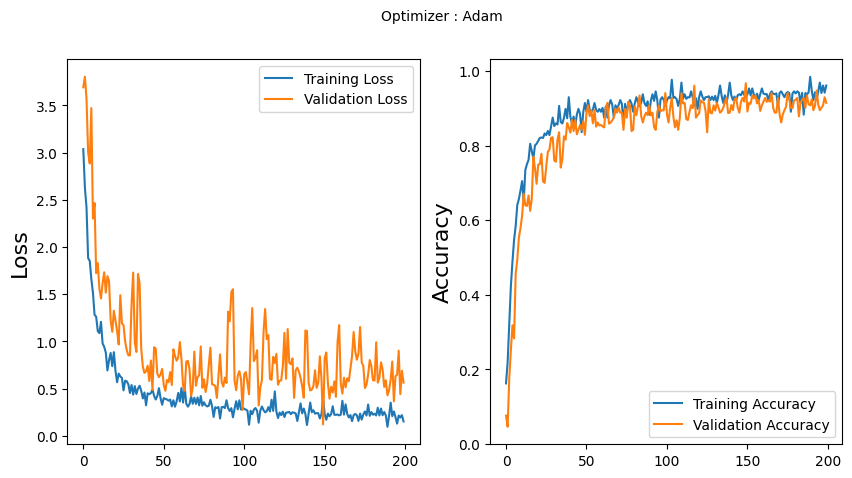

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()